Содержание:

1. Первичная обработка данных
    1. Подготовка к обработке
    2. Работа с пропусками
2. Способы оценки влияния входных признаков на целевую переменную

------------------------

In [1]:
import warnings


warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import typing as t
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_weather = pd.read_csv('weatherAUS.csv', parse_dates=['Date'], date_format=r'%Y-%m-%d').drop(columns=['Rainfall', 'RainToday'])
df_weather

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,NaN,NaN,W,44.0,W,WNW,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,2008-12-02,Albury,7.4,25.1,NaN,NaN,WNW,44.0,NNW,WSW,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,2008-12-03,Albury,12.9,25.7,NaN,NaN,WSW,46.0,W,WSW,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,2008-12-04,Albury,9.2,28.0,NaN,NaN,NE,24.0,SE,E,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,2008-12-05,Albury,17.5,32.3,NaN,NaN,W,41.0,ENE,NW,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,NaN,NaN,E,31.0,SE,ENE,...,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No
145456,2017-06-22,Uluru,3.6,25.3,NaN,NaN,NNW,22.0,SE,N,...,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No
145457,2017-06-23,Uluru,5.4,26.9,NaN,NaN,N,37.0,SE,WNW,...,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No
145458,2017-06-24,Uluru,7.8,27.0,NaN,NaN,SE,28.0,SSE,N,...,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No


In [4]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Evaporation    82670 non-null   float64       
 5   Sunshine       75625 non-null   float64       
 6   WindGustDir    135134 non-null  object        
 7   WindGustSpeed  135197 non-null  float64       
 8   WindDir9am     134894 non-null  object        
 9   WindDir3pm     141232 non-null  object        
 10  WindSpeed9am   143693 non-null  float64       
 11  WindSpeed3pm   142398 non-null  float64       
 12  Humidity9am    142806 non-null  float64       
 13  Humidity3pm    140953 non-null  float64       
 14  Pressure9am    130395 non-null  float64       
 15  

# 1. Первичная обработка данных

## 1.1 Подготовка к обработке

In [5]:
df_weather.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainTomorrow      3267
dtype: int64

In [6]:
df_weather.shape

(145460, 21)

In [7]:
df_weather = df_weather[df_weather['RainTomorrow'].notna()]
df_weather.shape

(142193, 21)

In [8]:
df_weather['RainTomorrow'].isna().sum()

0

In [9]:
df_weather['year'] = df_weather['Date'].dt.year
df_weather['month'] = df_weather['Date'].dt.month
df_weather['day'] = df_weather['Date'].dt.day
df_weather = df_weather.drop(columns=['Date'])
df_weather

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow,year,month,day
0,Albury,13.4,22.9,NaN,NaN,W,44.0,W,WNW,20.0,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,2008,12,1
1,Albury,7.4,25.1,NaN,NaN,WNW,44.0,NNW,WSW,4.0,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,2008,12,2
2,Albury,12.9,25.7,NaN,NaN,WSW,46.0,W,WSW,19.0,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,2008,12,3
3,Albury,9.2,28.0,NaN,NaN,NE,24.0,SE,E,11.0,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,2008,12,4
4,Albury,17.5,32.3,NaN,NaN,W,41.0,ENE,NW,7.0,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,NaN,NaN,E,31.0,ESE,E,15.0,...,1024.7,1021.2,NaN,NaN,9.4,20.9,No,2017,6,20
145455,Uluru,2.8,23.4,NaN,NaN,E,31.0,SE,ENE,13.0,...,1024.6,1020.3,NaN,NaN,10.1,22.4,No,2017,6,21
145456,Uluru,3.6,25.3,NaN,NaN,NNW,22.0,SE,N,13.0,...,1023.5,1019.1,NaN,NaN,10.9,24.5,No,2017,6,22
145457,Uluru,5.4,26.9,NaN,NaN,N,37.0,SE,WNW,9.0,...,1021.0,1016.8,NaN,NaN,12.5,26.1,No,2017,6,23


In [47]:
rule = {
    'No': 0,
    'Yes': 1
}

X = df_weather.drop(columns=['RainTomorrow'])
y = df_weather['RainTomorrow'].map(rule)

In [11]:
X.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'year', 'month', 'day'],
      dtype='object')

In [12]:
y

0         0
1         0
2         0
3         0
4         0
         ..
145454    0
145455    0
145456    0
145457    0
145458    0
Name: RainTomorrow, Length: 142193, dtype: int64

## 1.2 Работа с пропусками

In [13]:
nan_columns = X.columns[X.isna().sum() != 0]
nan_columns

Index(['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'],
      dtype='object')

<Axes: >

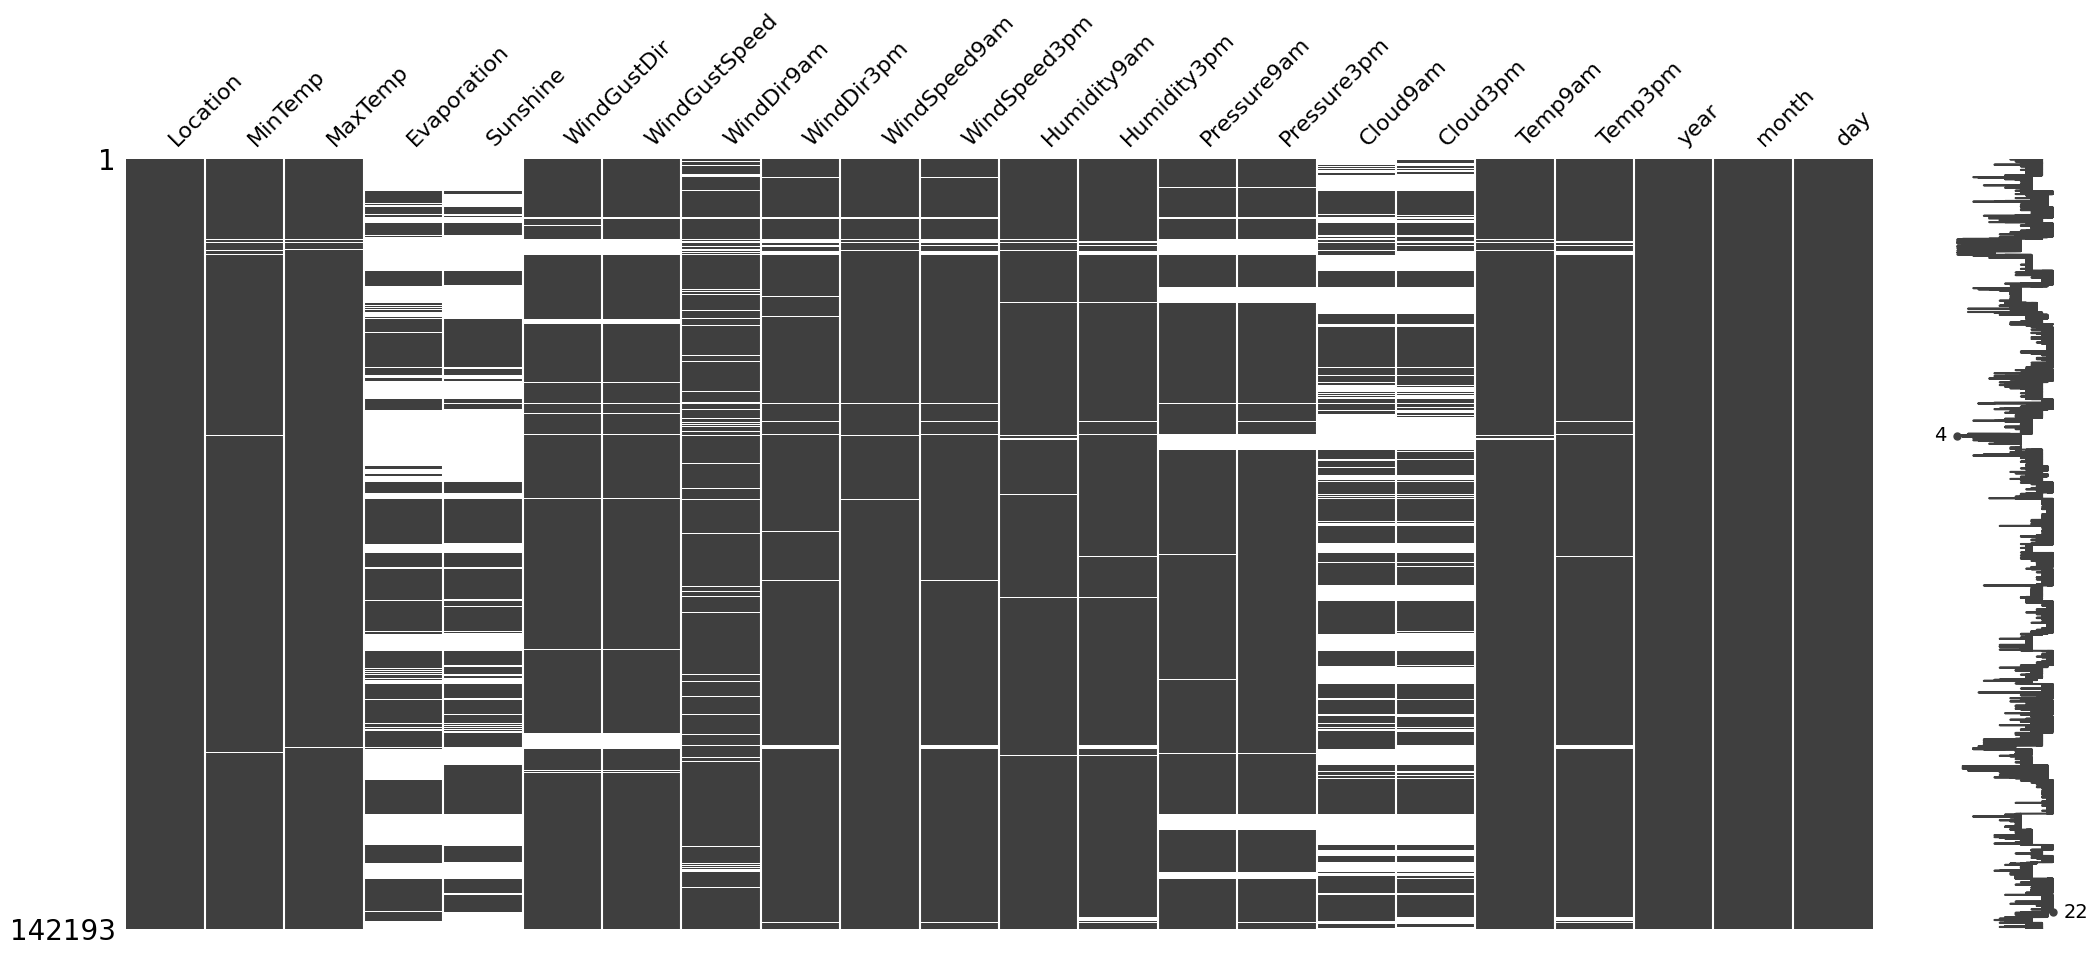

In [14]:
import missingno as msno


msno.matrix(X)

In [15]:
X

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,day
0,Albury,13.4,22.9,NaN,NaN,W,44.0,W,WNW,20.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,Albury,7.4,25.1,NaN,NaN,WNW,44.0,NNW,WSW,4.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,Albury,12.9,25.7,NaN,NaN,WSW,46.0,W,WSW,19.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,Albury,9.2,28.0,NaN,NaN,NE,24.0,SE,E,11.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,Albury,17.5,32.3,NaN,NaN,W,41.0,ENE,NW,7.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,NaN,NaN,E,31.0,ESE,E,15.0,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,2017,6,20
145455,Uluru,2.8,23.4,NaN,NaN,E,31.0,SE,ENE,13.0,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,2017,6,21
145456,Uluru,3.6,25.3,NaN,NaN,NNW,22.0,SE,N,13.0,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,2017,6,22
145457,Uluru,5.4,26.9,NaN,NaN,N,37.0,SE,WNW,9.0,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,2017,6,23


Исследуем заполнение пропусков в признаках при помощи статистических методов.

Идея исследования заключается в следующем. Первоначально данные с пропусками имеют свое распределение (для фиксированного признака). Представим, что они были получены из некоторой случайной величины, функцию распределения которой мы смоделируем при помощи эмпирической функции распределения и гистограммы. Значения определенного признака тем самым формируют вариационный ряд. Будем заполнять пропуски определенным значением (например, статистикой: средним, модой или медианой, а может, случайными значениями из интервала). Значение будет считаться успешным (то есть будет нам подходить), если:
1. структура эмпирической функции не поменяется;
2. будут отсутствовать новые резкие выбросы в столбцах гистограммы;
3. значение метрики вложенности двух распределений (дивергенция Кульбака-Лейблера) будет сравнительно небольшим (идеально, когда она равна нулю, значит, распределения совпали).

Для того, чтобы построить гистограмму, нам нужно зафиксировать количество интервалов разбиения $N_i$ (для $i$-го признака) вариационного ряда относительно исходного распределения без заполнения пропусков. Для этого будем пользоваться эмпирической формулой Стерджеса: 

$$N_i = \frac{r_i}{1 + 3.222 \cdot \lg(n_i)},$$

где $r_i$ -- размах, а $n_i$ -- размерность вариационного ряда.

Для этого напишем функцию, которая будет вычислять количество интервалов разбиения вариационного ряда.

In [16]:
def calc_bins(x: t.Iterable):
    return int(np.ceil((np.max(x) - np.min(x)) / int(1 + 3.222 * np.log10(len(x)))))

Также напишем функцию, которая будет вычислять дивергенцию Кульбака-Лейблера. Для этого сформируем полигоны частот при помощи модуля numpy, а также функции entropy из библиотеки scipy.

In [17]:
from scipy.stats import entropy


def calc_kl_divergence(x: t.Iterable, new_x: t.Iterable) -> int:
    bins = calc_bins(x)
    p, _ = np.histogram(x)
    q, _ = np.histogram(new_x)
    return entropy(p, q)

Напишем функцию для визуализации полученных гистограмм "до заполнения" и "после заполнения".

In [18]:
def draw_hist(x, new_x) -> None:
    fig, ax = plt.subplots(1, 2, figsize=(16, 4))
    fig.suptitle(f"Дивергенция Кульбака-Лейблера: {calc_kl_divergence(x, new_x):.6f}")
    sns.histplot(x, kde=True, stat='density', label='Исходные данные', ax=ax[0], color='green')
    sns.histplot(new_x, kde=True, stat='density', label='Данные после заполнения', ax=ax[1], color='red')
    fig.legend()

А также напишем результирующую функцию, в которую мы будем подавать исходные набор данных, наименование признака и значение для заполнения пропусков. И которая будет осуществлять старт логики по исследованию результата заполнения.

In [19]:
def test_density_fillna(df: pd.DataFrame, col: str, val: t.Any) -> None:
    x = df[col].dropna()
    new_x = df[col].fillna(val)

    draw_hist(x, new_x)

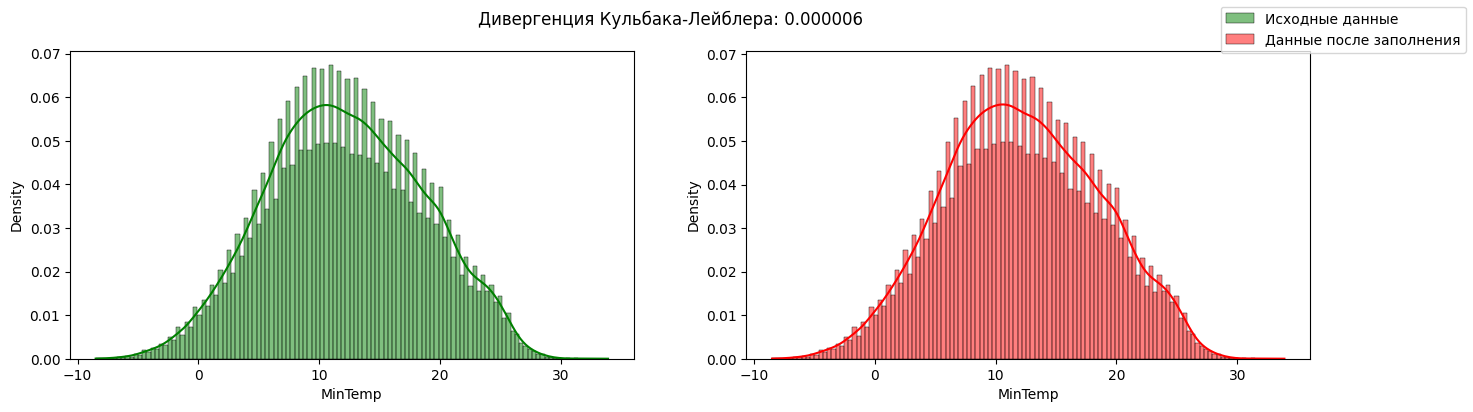

In [20]:
col = 'MinTemp'

test_density_fillna(df_weather, col, {
    key: np.random.uniform(5, 15) for key in df_weather[col][df_weather[col].isna()].keys()
})

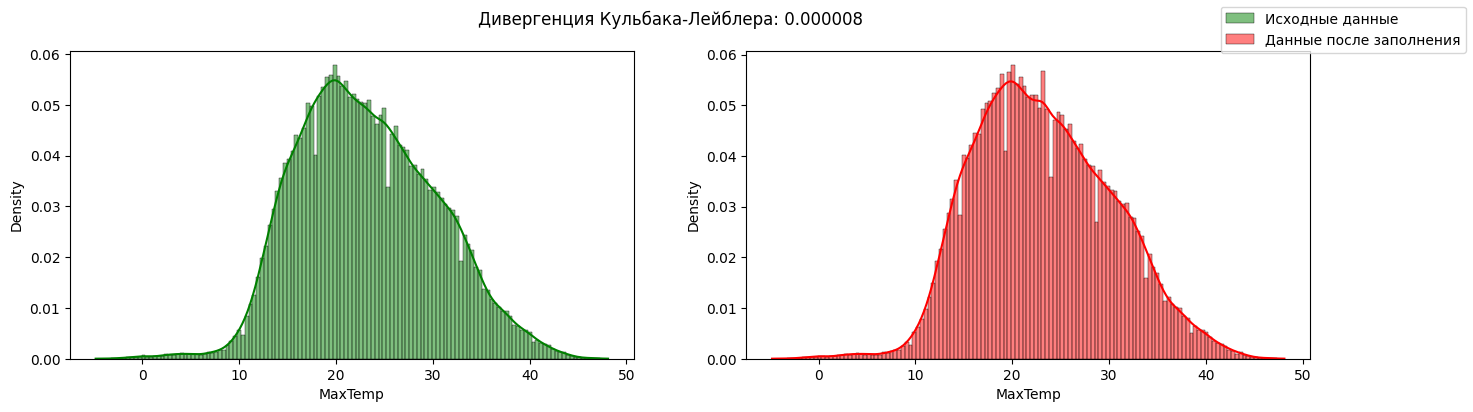

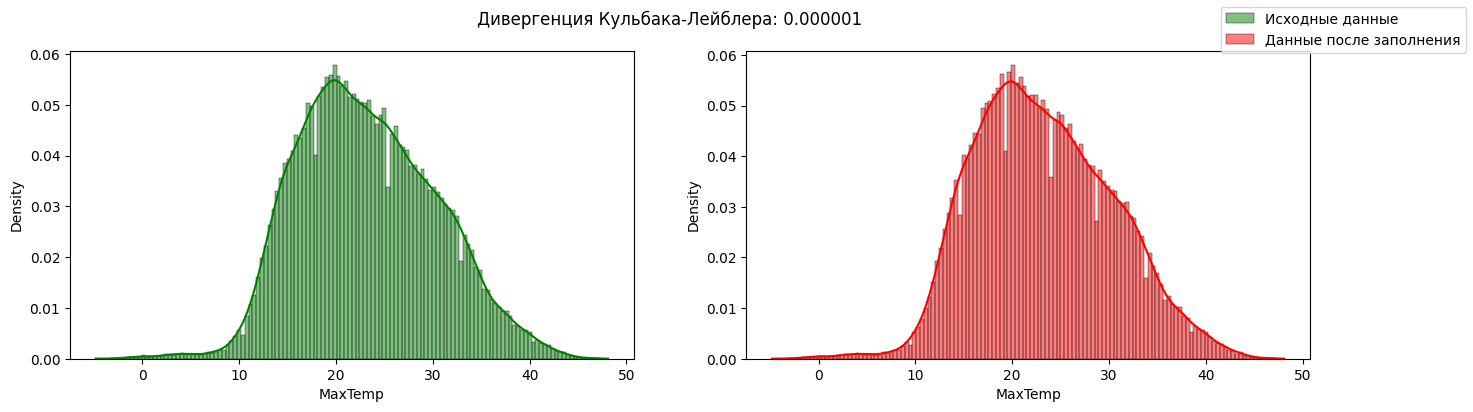

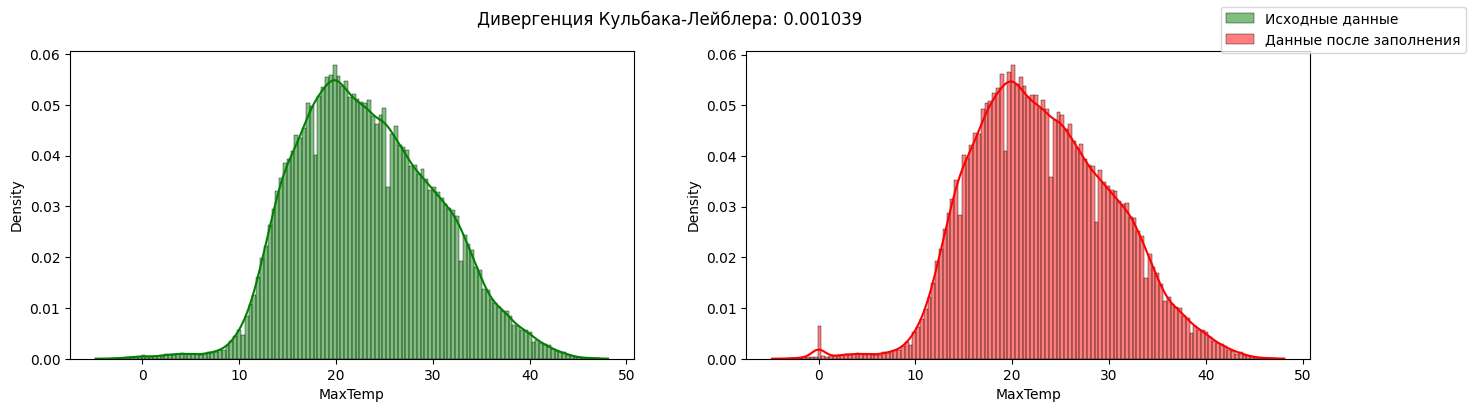

In [21]:
col = 'MaxTemp'

test_density_fillna(df_weather, col, df_weather[col].mean())
test_density_fillna(df_weather, col, {
    key: np.random.uniform(10, 40) for key in df_weather[col][df_weather[col].isna()].keys()
})
test_density_fillna(df_weather, col, 0)

# 2. Способы оценки влияния входных признаков между собой

In [22]:
X_categorical = X.select_dtypes(['object'])
X_categorical

,Location,WindGustDir,WindDir9am,WindDir3pm
0,Albury,W,W,WNW
1,Albury,WNW,NNW,WSW
2,Albury,WSW,W,WSW
3,Albury,NE,SE,E
4,Albury,W,ENE,NW
...,...,...,...,...
145454,Uluru,E,ESE,E
145455,Uluru,E,SE,ENE
145456,Uluru,NNW,SE,N
145457,Uluru,N,SE,WNW


In [23]:
from scipy.stats import mode


for column in X_categorical.columns:
    X_categorical[column] = X_categorical[column].fillna(mode(X_categorical[column]).mode.item())
X_categorical

,Location,WindGustDir,WindDir9am,WindDir3pm
0,Albury,W,W,WNW
1,Albury,WNW,NNW,WSW
2,Albury,WSW,W,WSW
3,Albury,NE,SE,E
4,Albury,W,ENE,NW
...,...,...,...,...
145454,Uluru,E,ESE,E
145455,Uluru,E,SE,ENE
145456,Uluru,NNW,SE,N
145457,Uluru,N,SE,WNW


In [24]:
X_categorical.isna().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
dtype: int64

In [25]:
X_numerical = X.select_dtypes(exclude=['object'])
X_numerical

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,day
0,13.4,22.9,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,NaN,NaN,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,2017,6,20
145455,2.8,23.4,NaN,NaN,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,2017,6,21
145456,3.6,25.3,NaN,NaN,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,2017,6,22
145457,5.4,26.9,NaN,NaN,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,2017,6,23


In [26]:
for column in X_numerical.columns:
    X_numerical[column] = X_numerical[column].fillna(X_numerical[column].mean())
X_numerical

,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,year,month,day
0,13.4,22.9,5.469824,7.624853,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,2008,12,1
1,7.4,25.1,5.469824,7.624853,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,2008,12,2
2,12.9,25.7,5.469824,7.624853,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,2008,12,3
3,9.2,28.0,5.469824,7.624853,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,2008,12,4
4,17.5,32.3,5.469824,7.624853,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,5.469824,7.624853,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,4.437189,4.503167,9.4,20.9,2017,6,20
145455,2.8,23.4,5.469824,7.624853,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,4.437189,4.503167,10.1,22.4,2017,6,21
145456,3.6,25.3,5.469824,7.624853,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,4.437189,4.503167,10.9,24.5,2017,6,22
145457,5.4,26.9,5.469824,7.624853,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,4.437189,4.503167,12.5,26.1,2017,6,23


In [27]:
X_numerical.isna().sum()

MinTemp          0
MaxTemp          0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
year             0
month            0
day              0
dtype: int64

## 2.1 Корреляция вещественных признаков

<Axes: >

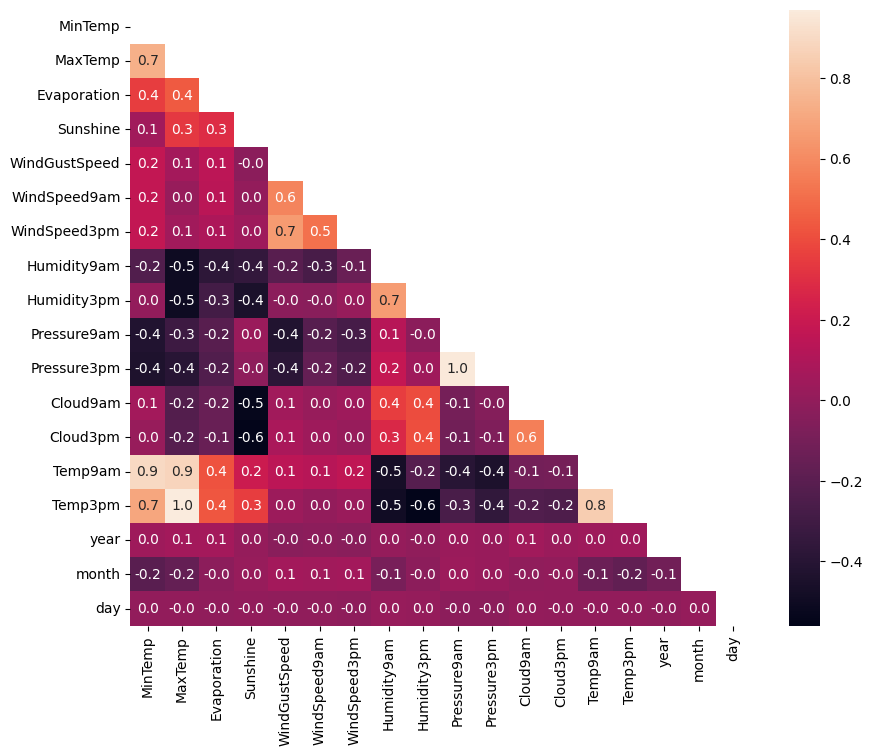

In [28]:
plt.figure(figsize=(10, 8))
corr = X_numerical.corr()
sns.heatmap(corr, mask=np.triu(np.ones_like(corr, dtype=bool)), annot=True, fmt='.1f')

## 2.2 Коэффициент сопряженности Краммера

Коэффициент сопряженности Краммера (Cramer's V coefficient) - это статистическая мера ассоциации между двумя категориальными переменными, которая измеряет силу связи между ними в диапазоне от 0 до 1. Коэффициент сопряженности Краммера может быть использован для оценки степени связи между двумя категориальными переменными, когда размеры категорий различаются.

Коэффициент сопряженности Краммера вычисляется на основе хи-квадрат статистики и степеней свободы таблицы сопряженности (contingency table). 

In [29]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Пример использования
print(cramers_v(X_categorical['Location'], X_categorical['WindGustDir']))

0.24050305901560487


<Axes: >

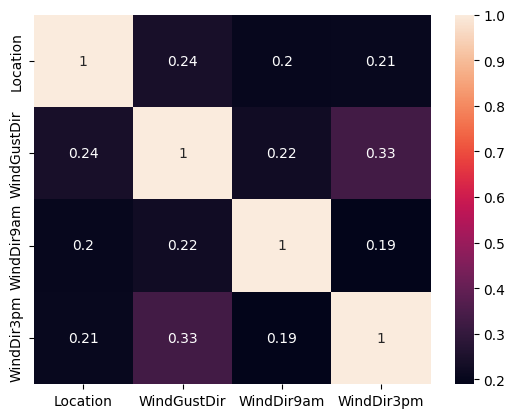

In [30]:
import itertools

crammer_coef = pd.DataFrame(np.eye(len(X_categorical.columns)), columns=X_categorical.columns, index=X_categorical.columns)
for a, b in list(itertools.combinations(X_categorical.columns, 2)):
    value = cramers_v(X_categorical[a], X_categorical[b])
    
    crammer_coef.loc[a][b] = value
    crammer_coef.loc[b][a] = value
    
sns.heatmap(crammer_coef, annot=True)

## 2.3 Попарная визуализация

<Axes: xlabel='Temp3pm', ylabel='MaxTemp'>

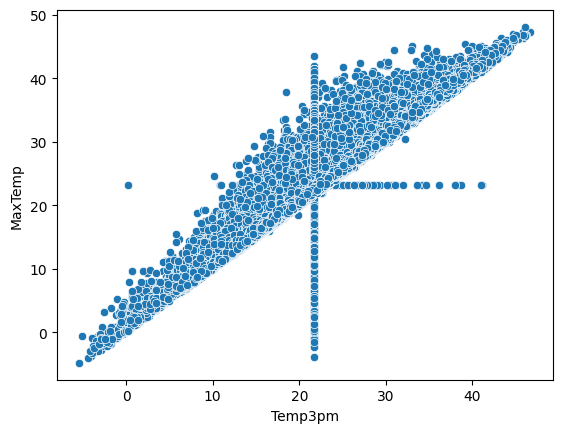

In [38]:
sns.scatterplot(data=X_numerical, x='Temp3pm', y='MaxTemp')

<Axes: xlabel='MinTemp', ylabel='Sunshine'>

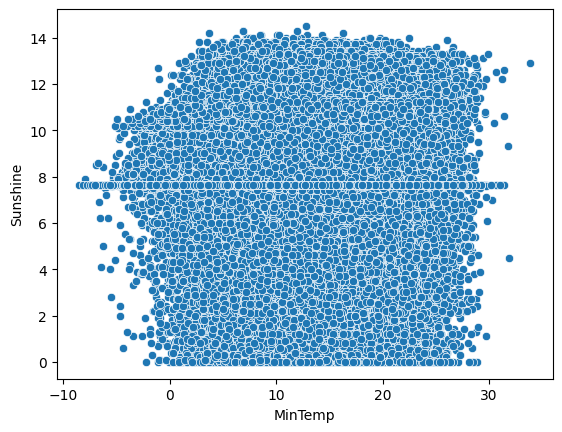

In [39]:
sns.scatterplot(data=X_numerical, x='MinTemp', y='Sunshine')

# 3. Способы оценки влияния входных признаков на целевую переменную

## 3.1 Корреляция с целевым признаком

<BarContainer object of 19 artists>

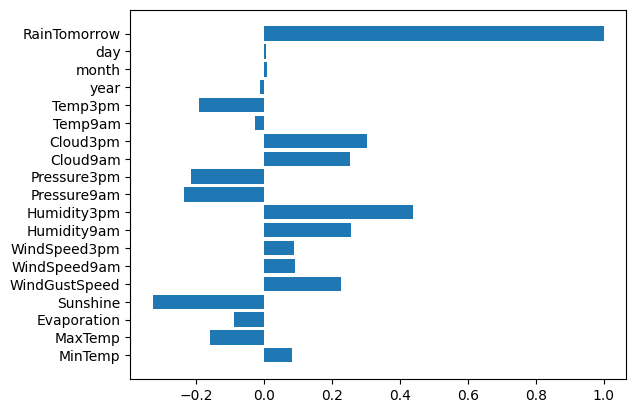

In [58]:
width = pd.concat([X_numerical, y], axis=1).corr().loc['RainTomorrow']
plt.barh(width.keys(), width)

## 3.2 Влияние на целевой признак (тест Фишера)

In [ ]:
skb = SelectKBest(k=2)
X_skb = skb.fit_transform(X, y)

In [ ]:
skb.get_feature_names_out()

## 3.3 Влияние на целевой признак (энтропия решающего дерева)

In [ ]:
# 3. RFE - рекурсивный отбор признаков относительно индекса информативности решающего дерева

tree = DecisionTreeClassifier().fit(X, y)

rfe = RFE(estimator=tree, n_features_to_select=2, step=1).fit(X, y)
X_rfe = pd.DataFrame(rfe.transform(X), columns=rfe.get_feature_names_out())
rfe.get_feature_names_out()

In [ ]:
plt.barh(width=tree.feature_importances_, y=X.columns);

## 3.4 Влияние на целевой признак (линейные модели)

In [ ]:
from sklearn.linear_model import Lasso

lr = Lasso(0.6).fit(X, y)

In [ ]:
X.columns[lr.coef_ > 0.01]